In [22]:
# Library & prepare training, testing data
library(caret)
library(xgboost)
colClasses=c("integer", "factor", "integer", "factor", "integer", "factor", "factor", "factor", "factor", "factor",
             "integer", "integer", "integer", "factor", "factor")

url_train <- "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data_train <- read.table( file=url_train, header=FALSE, colClasses=colClasses, sep=",", strip.white=TRUE )

url_test <- "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
data_test <- read.table( file=url_test, skip=1, header=FALSE, colClasses=colClasses, sep=",", strip.white=TRUE)

#remove trailing dot
data_test[,15] <- factor(sub("\\.", "", data_test[,15]))

# inTrain <- createDataPartition(y=data_train$V15, p=0.7, list=FALSE)
# training <- data_train[inTrain,]
# validation <- data_train[-inTrain,]


In [23]:
set.seed(1234)
ctrl <- trainControl( method = "cv", number = 5 )
xgbFit <- train( V15 ~ ., data = data_train, method = 'xgbTree', trControl = ctrl )


In [24]:
xgbFit

eXtreme Gradient Boosting 

32561 samples
   14 predictor
    2 classes: '<=50K', '>50K' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26049, 26049, 26049, 26048, 26049 
Resampling results across tuning parameters:

  eta  max_depth  colsample_bytree  subsample  nrounds  Accuracy   Kappa    
  0.3  1          0.6               0.50        50      0.8554406  0.5593772
  0.3  1          0.6               0.50       100      0.8591261  0.5795727
  0.3  1          0.6               0.50       150      0.8625351  0.5931115
  0.3  1          0.6               0.75        50      0.8540279  0.5537290
  0.3  1          0.6               0.75       100      0.8582354  0.5740031
  0.3  1          0.6               0.75       150      0.8609994  0.5863801
  0.3  1          0.6               1.00        50      0.8544886  0.5547788
  0.3  1          0.6               1.00       100      0.8578668  0.5722410
  0.3  1          0.6               1.00       150    

In [25]:
# Predicting response variable
p <- predict(xgbFit , data_test)
confusionMatrix(p, data_test$V15)

Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 11704  1303
     >50K    731  2543
                                          
               Accuracy : 0.8751          
                 95% CI : (0.8699, 0.8801)
    No Information Rate : 0.7638          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.635           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9412          
            Specificity : 0.6612          
         Pos Pred Value : 0.8998          
         Neg Pred Value : 0.7767          
             Prevalence : 0.7638          
         Detection Rate : 0.7189          
   Detection Prevalence : 0.7989          
      Balanced Accuracy : 0.8012          
                                          
       'Positive' Class : <=50K           
                                          

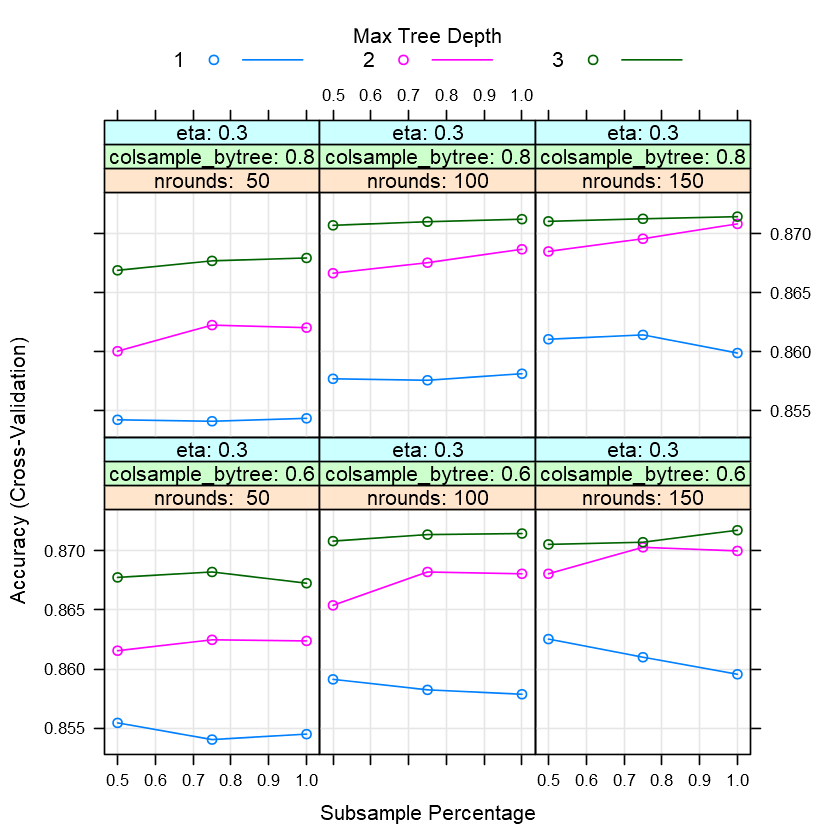

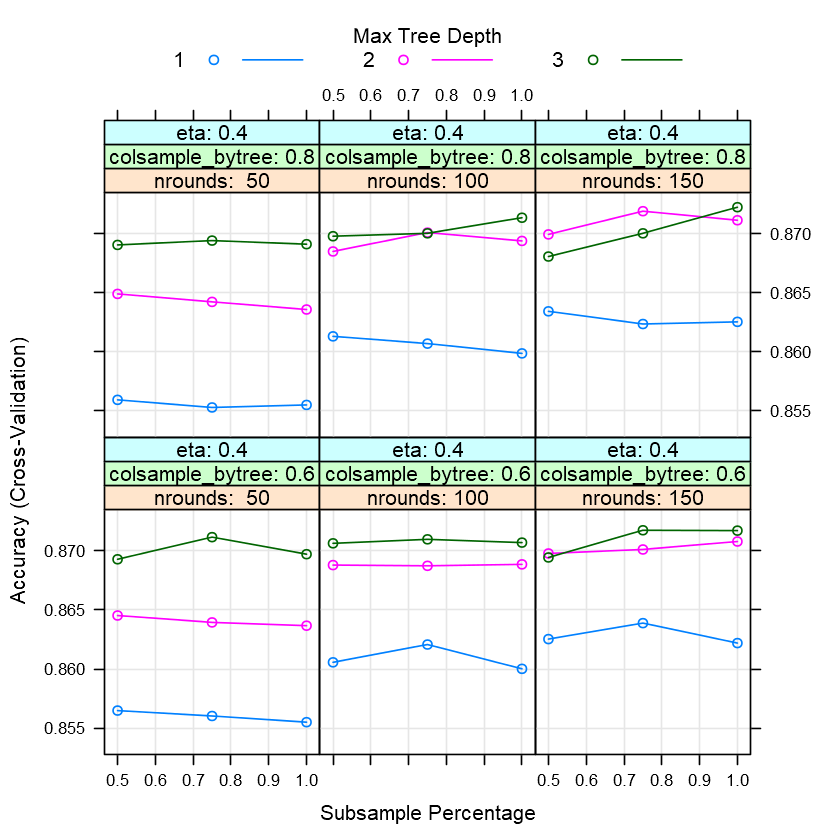

In [26]:
plot(xgbFit)

In [27]:
p <- predict(xgbFit ,data_test)
t <- factor(sub(" ", "", data_test$V15))
levels(data_test$V15)
confusionMatrix(p, t)

[1] "<=50K" ">50K"

Confusion Matrix and Statistics

          Reference
Prediction <=50K  >50K
     <=50K 11704  1303
     >50K    731  2543
                                          
               Accuracy : 0.8751          
                 95% CI : (0.8699, 0.8801)
    No Information Rate : 0.7638          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.635           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9412          
            Specificity : 0.6612          
         Pos Pred Value : 0.8998          
         Neg Pred Value : 0.7767          
             Prevalence : 0.7638          
         Detection Rate : 0.7189          
   Detection Prevalence : 0.7989          
      Balanced Accuracy : 0.8012          
                                          
       'Positive' Class : <=50K           
                                          